<a href="https://colab.research.google.com/github/diegoOrd123/Examen-Primer-parcial/blob/main/Primer_parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importamos las librerias necesarias

In [59]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [60]:
input_layer_size  = 14
num_labels = 5
data = pd.read_csv('/content/drive/MyDrive/Dataset/Base.csv', delimiter=';')
print(data.shape)

data.info()

(1000000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   income                        1000000 non-null  float64
 1   name_email_similarity         1000000 non-null  float64
 2   prev_address_months_count     1000000 non-null  int64  
 3   current_address_months_count  1000000 non-null  int64  
 4   customer_age                  1000000 non-null  int64  
 5   intended_balcon_amount        1000000 non-null  float64
 6   zip_count_4w                  1000000 non-null  int64  
 7   velocity_6h                   1000000 non-null  float64
 8   velocity_24h                  1000000 non-null  float64
 9   velocity_4w                   1000000 non-null  float64
 10  credit_risk_score             1000000 non-null  int64  
 11  bank_months_count             1000000 non-null  int64  
 12  proposed_credit

In [63]:


def generate_synthetic_data_with_perturbations(num_samples, real_data):
    synthetic_data = {}

    # Definir un rango de perturbaciones
    perturbation_scale = 0.1

    for col in real_data.columns:
        if real_data[col].dtype in [np.float64, np.int64]:
            unique_values = real_data[col].values

            # Generar datos sintéticos
            base_values = np.random.choice(unique_values, size=num_samples)
            perturbations = base_values * np.random.uniform(-perturbation_scale, perturbation_scale, size=num_samples)
            synthetic_data[col] = base_values + perturbations

        elif real_data[col].dtype == object:
            # Para columnas categóricas
            synthetic_data[col] = np.random.choice(real_data[col].unique(), size=num_samples)

    return pd.DataFrame(synthetic_data)



syntheticData = generate_synthetic_data_with_perturbations(1000000, data)

# Concatenar con el DataFrame original
combinedData = pd.concat([data, syntheticData], ignore_index=True)

print(combinedData.shape)

(2000000, 14)


In [62]:
y = combinedData.iloc[:, -1]
print(y)
mapping = {'AB': 0, 'AA': 1, 'AC': 2, 'AE': 3, 'AD': 4}
def convert_column_to_numeric(data, mapping):
    vectorized_map = np.vectorize(mapping.get)
    numeric_data = vectorized_map(data)
    return numeric_data
numeric_data = convert_column_to_numeric(y, mapping)
y = numeric_data
print(y)

0          AA
1          AD
2          AB
3          AB
4          AA
           ..
1999995    AC
1999996    AB
1999997    AC
1999998    AA
1999999    AB
Name: payment_type, Length: 2000000, dtype: object
[1 4 0 ... 2 1 0]


In [64]:
X=combinedData.iloc[:,:-1]
print(X.shape)
def income_group(income):
    if income < 3:
        return 'Low'
    elif 3 <= income < 7:
        return 'Medium'
    else:
        return 'High'
X['income_level'] = X['income'].apply(income_group)
print(X.shape)
print(X)

(2000000, 13)
(2000000, 14)
               income  name_email_similarity  prev_address_months_count  \
0        3.000000e+00           9.865060e+14                  -1.000000   
1        8.000000e+00           6.174260e+15                  -1.000000   
2        8.000000e+00           9.967070e+15                   9.000000   
3        6.000000e+15           4.751000e+15                  11.000000   
4        9.000000e+00           8.423070e+15                  -1.000000   
...               ...                    ...                        ...   
1999995  5.922417e+15           4.719076e+15                  -0.953121   
1999996  1.047954e+00           1.130409e+15                  -0.928225   
1999997  6.760497e+15           9.586741e+12                  32.291126   
1999998  2.173697e+00           3.858849e+15                  -1.026554   
1999999  6.790013e+15           8.615152e+15                  95.575156   

         current_address_months_count  customer_age  intended_balcon_am

In [65]:
X['has_long_stable_address'] = (
    (X['prev_address_months_count'] >= 52) |
    (X['current_address_months_count'] >= 52)
).astype(int)
print(X.shape)
print(X)

(2000000, 15)
               income  name_email_similarity  prev_address_months_count  \
0        3.000000e+00           9.865060e+14                  -1.000000   
1        8.000000e+00           6.174260e+15                  -1.000000   
2        8.000000e+00           9.967070e+15                   9.000000   
3        6.000000e+15           4.751000e+15                  11.000000   
4        9.000000e+00           8.423070e+15                  -1.000000   
...               ...                    ...                        ...   
1999995  5.922417e+15           4.719076e+15                  -0.953121   
1999996  1.047954e+00           1.130409e+15                  -0.928225   
1999997  6.760497e+15           9.586741e+12                  32.291126   
1999998  2.173697e+00           3.858849e+15                  -1.026554   
1999999  6.790013e+15           8.615152e+15                  95.575156   

         current_address_months_count  customer_age  intended_balcon_amount  \
0     

In [66]:
def risk_group(credit_risk_score):
    if credit_risk_score <= 83:
        return 'Low'
    elif 83 < credit_risk_score <= 122:
        return 'Medium'
    elif 122 < credit_risk_score <= 178:
        return 'High'
    else:
        return 'Very High'
X['risk_category'] = X['credit_risk_score'].apply(risk_group)
print(X.shape)
print(X)

(2000000, 16)
               income  name_email_similarity  prev_address_months_count  \
0        3.000000e+00           9.865060e+14                  -1.000000   
1        8.000000e+00           6.174260e+15                  -1.000000   
2        8.000000e+00           9.967070e+15                   9.000000   
3        6.000000e+15           4.751000e+15                  11.000000   
4        9.000000e+00           8.423070e+15                  -1.000000   
...               ...                    ...                        ...   
1999995  5.922417e+15           4.719076e+15                  -0.953121   
1999996  1.047954e+00           1.130409e+15                  -0.928225   
1999997  6.760497e+15           9.586741e+12                  32.291126   
1999998  2.173697e+00           3.858849e+15                  -1.026554   
1999999  6.790013e+15           8.615152e+15                  95.575156   

         current_address_months_count  customer_age  intended_balcon_amount  \
0     

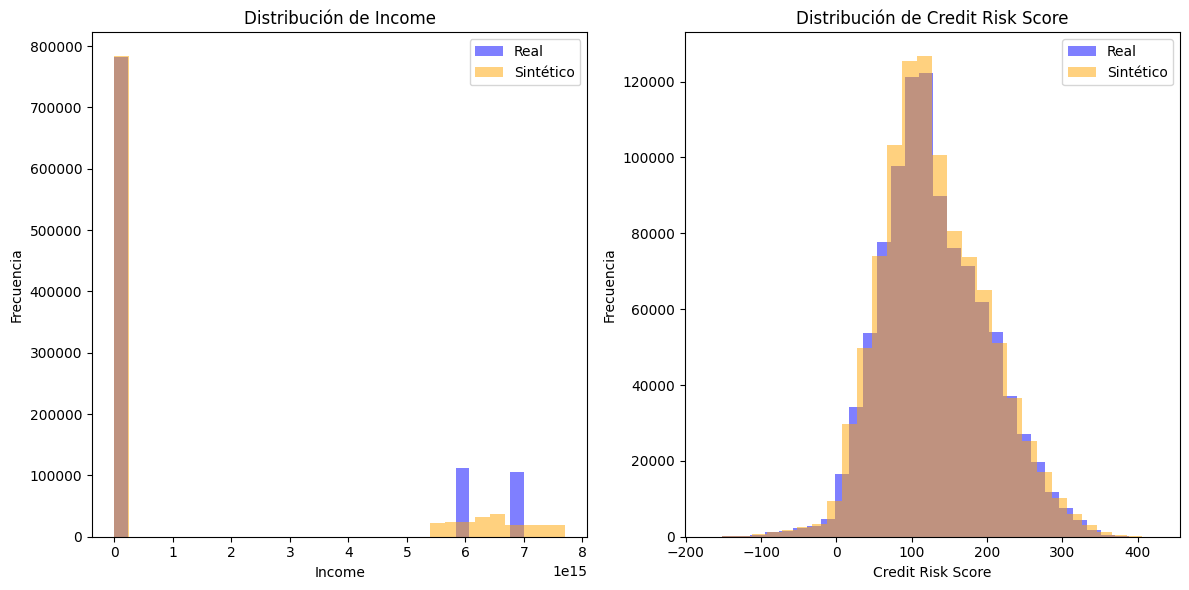

In [67]:
plt.figure(figsize=(12, 6))

# Gráfico para 'income'
plt.subplot(1, 2, 1)
plt.hist(data['income'], bins=30, alpha=0.5, label='Real', color='blue')
plt.hist(syntheticData['income'], bins=30, alpha=0.5, label='Sintético', color='orange')
plt.title('Distribución de Income')
plt.xlabel('Income')
plt.ylabel('Frecuencia')
plt.legend()

# Gráfico para 'credit_risk_score'
plt.subplot(1, 2, 2)
plt.hist(data['credit_risk_score'], bins=30, alpha=0.5, label='Real', color='blue')
plt.hist(syntheticData['credit_risk_score'], bins=30, alpha=0.5, label='Sintético', color='orange')
plt.title('Distribución de Credit Risk Score')
plt.xlabel('Credit Risk Score')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar gráficos
plt.tight_layout()
plt.show()

In [68]:
def convert_labels_to_binary(labels, uniquelabel):
    binary_labels = np.where(labels == uniquelabel, 1, 0)
    return binary_labels

In [69]:
category_mapping = {
    'Low': 1.0,
    'Medium': 2.0,
    'High': 3.0
}

# Función para convertir los strings a valores flotantes usando el diccionario
def map_category(value):
    return category_mapping.get(value, np.nan)

# Aplicar el mapeo solo a la columna de strings (índice 15, que es la columna 16)
X.iloc[:, 13] = X.iloc[:, 13].apply(map_category)
# Convertir toda la matriz a tipo float
#X = X.astype(float)

# Verificar que la conversión fue exitosa
print(X.iloc[:5, :])  # Mostrar las primeras 5 filas

         income  name_email_similarity  prev_address_months_count  \
0  3.000000e+00           9.865060e+14                       -1.0   
1  8.000000e+00           6.174260e+15                       -1.0   
2  8.000000e+00           9.967070e+15                        9.0   
3  6.000000e+15           4.751000e+15                       11.0   
4  9.000000e+00           8.423070e+15                       -1.0   

   current_address_months_count  customer_age  intended_balcon_amount  \
0                          25.0          40.0            1.024540e+16   
1                          89.0          20.0           -8.495510e+15   
2                          14.0          40.0           -1.490390e+16   
3                          14.0          30.0           -1.863100e+16   
4                          29.0          40.0            4.715250e+16   

   zip_count_4w   velocity_6h  velocity_24h   velocity_4w  credit_risk_score  \
0        1059.0  1.309600e+16  7.850960e+15  6.742080e+15         

In [70]:
category_mapping = {
    'Low': 1.0,
    'Medium': 2.0,
    'High': 3.0,
    'Very High': 4.0
}

# Función para convertir los strings a valores flotantes usando el diccionario
def map_category2(value):
    return category_mapping.get(value, np.nan)

# Aplicar el mapeo solo a la columna de strings (índice 15, que es la columna 16)
X.iloc[:, -1] = X.iloc[:, -1].apply(map_category2)
# Convertir toda la matriz a tipo float
#X = X.astype(float)

# Verificar que la conversión fue exitosa
print(X.iloc[:5, :])  # Mostrar las primeras 5 filas

         income  name_email_similarity  prev_address_months_count  \
0  3.000000e+00           9.865060e+14                       -1.0   
1  8.000000e+00           6.174260e+15                       -1.0   
2  8.000000e+00           9.967070e+15                        9.0   
3  6.000000e+15           4.751000e+15                       11.0   
4  9.000000e+00           8.423070e+15                       -1.0   

   current_address_months_count  customer_age  intended_balcon_amount  \
0                          25.0          40.0            1.024540e+16   
1                          89.0          20.0           -8.495510e+15   
2                          14.0          40.0           -1.490390e+16   
3                          14.0          30.0           -1.863100e+16   
4                          29.0          40.0            4.715250e+16   

   zip_count_4w   velocity_6h  velocity_24h   velocity_4w  credit_risk_score  \
0        1059.0  1.309600e+16  7.850960e+15  6.742080e+15         

In [ ]:
X = X.drop(columns=['risk_category'])

In [71]:
def  featureNormalize(X):
    X = np.asarray(X, dtype=np.float64)
    X_norm = X.copy() # Use the input X to create a copy
    mu = np.zeros(X.shape[1]) # Use the input X dimensions
    sigma = np.zeros(X.shape[1]) # Use the input X dimensions

    mu = np.mean(X, axis = 0) # Calculate the mean of the input X
    sigma = np.std(X, axis = 0) # Calculate the standard deviation of the input X
    X_norm = (X - mu) / sigma # Normalize the input X

    return X_norm, mu, sigma

In [72]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X_norm, mu, sigma = featureNormalize(X)
X = X_norm
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [73]:
print(X)

indices = np.arange(X.shape[0])
np.random.shuffle(indices)

split_index = int(0.8 * X.shape[0])
train_indices = indices[:split_index]
test_indices = indices[split_index:]


X_train = X[train_indices]
X_test = X[test_indices]

Y_train = y[train_indices]
Y_test = y[test_indices]
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training set shape:", Y_train.shape)
print("Test set shape:", Y_test.shape)

y_label0 = y.copy()
y_label0 = convert_labels_to_binary(y_label0, 0)
y_label1 = y.copy()
y_label1 = convert_labels_to_binary(y_label1, 1)
y_label2 = y.copy()
y_label2 = convert_labels_to_binary(y_label2, 2)
y_label3 = y.copy()
y_label3 = convert_labels_to_binary(y_label3, 3)


y_label0_train = y_label0[train_indices]
y_label0_test = y_label0[test_indices]
y_label1_train = y_label1[train_indices]
y_label1_test = y_label1[test_indices]
y_label2_train = y_label2[train_indices]
y_label2_test = y_label2[test_indices]
y_label3_train = y_label3[train_indices]
y_label3_test = y_label3[test_indices]

[[ 1.         -0.52384013 -1.17850698 ... -0.41073229 -1.17147694
   0.44930376]
 [ 1.         -0.52384013  0.5315851  ...  0.77966843  0.85362329
   0.44930376]
 [ 1.         -0.52384013  1.78184761 ...  0.77966843 -1.17147694
  -0.44446312]
 ...
 [ 1.          1.99377555 -1.5005388  ...  0.77966843 -1.17147694
   0.44930376]
 [ 1.         -0.52384013 -0.23166751 ... -1.60113302 -1.17147694
  -0.44446312]
 [ 1.          2.0047674   1.33620098 ...  0.77966843  0.85362329
   1.34307064]]
Training set shape: (1600000, 17)
Test set shape: (400000, 17)
Training set shape: (1600000,)
Test set shape: (400000,)


In [74]:
print(y_label0)
print(y_label1)
print(y_label2)
print(y_label3)

[0 0 1 ... 0 0 1]
[1 0 0 ... 0 1 0]
[0 0 0 ... 1 0 0]
[0 0 0 ... 0 0 0]


In [75]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [79]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    #print(J)
    return J

In [80]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []
    X = np.array(X)
    X = X.astype(float)
    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [83]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.003
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(17)
theta, J_history = descensoGradiente(theta, X_train, y_label0_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))


#print('Un estudiante con nota del examen 1: 80 y nota del examen 2: 46 (usando el descenso por el gradiente):{:.0f}'.format(aprueba))

KeyboardInterrupt: 